# Homework 3: Bayesian ML & Multiclass

## Bayesian Logistic Regression with Gaussian Priors

1. For the same dataset $\mathcal{D}$ described at the beginning of the Section, give an expression for the posterior density $p(w | \mathcal{D})$ in terms of the negative log-likelihood function $NLL_\mathcal{D}(w)$ and the prior density $p(w)$ (up to a proportionality constant is fine).

    $$p(w | \mathcal{D}) \propto e^{-NLL_\mathcal{D}(w)} * p(w)$$


2. Show that there exist a covariance matrix $\Sigma$ such that MAP (maximum a posteriori) estimate for $w$ after observing data $\mathcal{D}$ is the same as the minimizer of the regularized logistic regression function defined in Regularized Logistic Regression paragraph above, and give its value. [Hint: Consider minimizing the negative log posterior of $w$. Also, remember you can drop any terms from the objective function that don’t depend on $w$. You may freely use results of previous problems.]

    The regularized logistic regression function is:
    $$J(w) = \sum_{i = 1}^N log(1 + exp(-y_iw^Tx_i)) + \frac{\lambda}{2} w^Tw$$

    The MAP estimate for $w$ is:
    $$
    \begin{aligned}
    w_{MAP} &= \mathop{\arg\max}\limits_{w} p(w|\mathcal{D}) \\
    &= \mathop{\arg\max}\limits_{w} \log(p(w|\mathcal{D})) \\
    &= \mathop{\arg\max}\limits_{w} \{ -NLL_\mathcal{D}(w) + \log p(w) \}
    \end{aligned}
    $$

    Assume $w$ follows a Gaussian distribution $w \sim \mathcal{N} (0, \Sigma)$, then

    $$p(w) = \frac{1}{(2\pi^{d/2} \lvert \Sigma \rvert^{1/2})} \exp (-\frac{1}{2} w^T \Sigma^{-1} w)$$
    $$\log p(w) = -\frac{d}{2} \log(2\pi) - \frac{1}{2} \log \lvert \Sigma \rvert -\frac{1}{2} w^T \Sigma^{-1} w $$

    so,
    $$
    \begin{aligned}
    w_{MAP} &= \mathop{\arg\max}\limits_{w} \{ -NLL_\mathcal{D}(w) + \log p(w) \} \\
    &= \mathop{\arg\max}\limits_{w} \{ -NLL_\mathcal{D}(w) - \frac{d}{2} \log(2\pi) - \frac{1}{2} \log \lvert \Sigma \rvert -\frac{1}{2} w^T \Sigma^{-1} w \} \\
    &= \mathop{\arg\max}\limits_{w} \{-NLL_\mathcal{D}(w) - \frac{1}{2} w^T \Sigma^{-1} w \} \\
    &= \mathop{\arg\min}\limits_{w} \{ \sum_{i = 1}^N log(1 + exp(-y_iw^Tx_i)) + \frac{1}{2} w^T \Sigma^{-1} w \}
    \end{aligned}
    $$

    when $\frac{1}{2} w^T \Sigma^{-1} w = \frac{\lambda}{2} w^Tw$, $\Sigma^{-1} = \lambda I$
    
    which is, $\Sigma = \frac{1}{\lambda} I$


3. In the Bayesian approach, the prior should reﬂect your beliefs about the parameters before seeing the data and, in particular, should be independent on the eventual size of your dataset. Imagine choosing a prior distribution $w \sim \mathcal{N} (0, I)$. For a dataset $\mathcal{D}$ of size n, how should you choose $\lambda$ in our regularized logistic regression objective function so that the ERM is equal to the mode of the posterior distribution of $w$ (i.e. is equal to the MAP estimator).

    As proved in the previous question, the regularized logistic regression function is:
    $$J(w) = \sum_{i = 1}^N log(1 + exp(-y_iw^Tx_i)) + \frac{\lambda}{2} w^Tw$$

    The MAP estimate for $w$ is, in which $\Sigma = I$:
    $$\mathop{\arg\min}\limits_{w} \{ \sum_{i = 1}^N log(1 + exp(-y_iw^Tx_i)) + \frac{1}{2} w^T \Sigma^{-1} w \}$$

    To make the ERM equal to the mode of the posterior distribution of $w$,
    $$\lambda = 1$$

## Coin Flipping with Partial Observability

Consider flipping a biased coin where $p(z = H|\theta_1) = \theta_1$. However, we cannot directly observe the result $z$. Instead, someone reports the result to us, which we denotey by $x$. Further, there is a chance that the result is reported incorrectly if it’s a head. Specifically, we have $p(x = H|z = H,\theta_2) = \theta_2 and p(x = T | z = T) = 1$.

4. Show that $p(x = H | \theta_1, \theta_2) = \theta_1\theta_2$.

    Because of the conditional probability rules,
    $$
    \begin{aligned}
    p(x = H | \theta_1, \theta_2) &= p(x = H|z = H,\theta_2)p(z = H|\theta_1) + p(x = H|z = T,\theta_2)p(z = T|\theta_1) \\ 
    &= \theta_1\theta_2 + (1 - p(x = T|z = T,\theta_2))p(z = T|\theta_1) \\ 
    &= \theta_1\theta_2 + 0 \\ 
    &= \theta_1\theta_2
    \end{aligned}
    $$


5. Given a set of reported results $\mathcal{D}_r$ of size $N_r$, where the number of heads is $n_h$ and the number of tails is $n_t$ , what is the likelihood of $\mathcal{D}_r$ as a function of $\theta_1$ and $\theta_2$.

    $$
    \begin{aligned}
    P(x = T | \theta_1, \theta_2) &= P(x = T | z = H, \theta_1, \theta_2) + P(x = T | z = T, \theta_1, \theta_2) \\
    &= \theta_1 \cdot (1 - \theta_2) + (1 - \theta_1) \cdot 1 \\
    &= 1 - \theta_1 \theta_2
    \end{aligned}
    $$

    $$
    \begin{aligned}
    L(\mathcal{D} | \theta_1, \theta_2) &= \prod_{i = 1}^{N_r} p(x_i|\theta_1, \theta_2) \\ 
    &= (\theta_1\theta_2)^{n_h} \cdot (1 - \theta_1\theta_2)^{n_t}
    \end{aligned}
    $$


6. Can we estimate $\theta_1$ and $\theta_2$ using MLE? Explain your judgment.

    Partially yes, we can. We can find where the function L will be the max by calculating the derivative of the function L and find where the derivative is 0. At the point, the value of $\theta_1$ and $\theta_2$ is what we estimated.

    $$\log(L(\mathcal{D} | \theta_1, \theta_2)) = n_h\log(\theta_1\theta_2) + n_t\log(1 - \theta_1\theta_2)$$
    $$\frac{\partial{\log(L(\mathcal{D} | \theta_1, \theta_2))}}{\partial\theta_1} = \frac{n_h}{\theta_1} - \frac{\theta_2 n_t}{1 - \theta_1\theta_2} = 0$$
    $$\frac{\partial{\log(L(\mathcal{D} | \theta_1, \theta_2))}}{\partial\theta_2} = \frac{n_h}{\theta_2} - \frac{\theta_1 n_t}{1 - \theta_1\theta_2} = 0$$

    $$n_h - \theta_1\theta_2n_h - \theta_1\theta_2n_t = 0$$
    $$n_h - \theta_1\theta_2N_r = 0$$
    $$\theta_1\theta_2 = \frac{n_h}{N_r}$$

    As we can see from the equations above, we can estimate the product of $\theta_1$ and $\theta_2$ = $\frac{n_h}{N_r}$, but we cannot estimate them respectively.


7. We additionally obtained a set of clean results $\mathcal{D_c}$ of size $N_c$, where $x$ is directly observed without the reporter in the middle. Given that there are $c_h$ heads and $c_t$ tails, estimate $\theta_1$ and $\theta_2$ by MLE taking the two data sets into account. Note that the likelihood is $L(\theta_1, \theta_2) = p(\mathcal{D}_r, \mathcal{D}_c|\theta_1, \theta_2)$.

    Since dataset $\mathcal{D}_c$ and $\mathcal{D}_c$ are independent from each other, we can express the joint likelihood as the product of the likelihood of each dataset.

    $$\begin{aligned}
    L(\theta_1, \theta_2) &= p(\mathcal{D}_r, \mathcal{D}_c|\theta_1, \theta_2) \\
    &= p(\mathcal{D}_r|\theta_1, \theta_2) \cdot p(\mathcal{D}_c|\theta_1, \theta_2)
    \end{aligned}$$

    $$\begin{aligned}
    p(\mathcal{D}_r|\theta_1, \theta_2) &= \prod_{i = 1}^{N_c} p(x_i|\theta_1, \theta_2) \\
    &= \theta_1^{c_h} \cdot (1 - \theta_1)^{c_t}
    \end{aligned}$$

    So, the log likelihood can be represented as:
    $$\begin{aligned}
    \log(p(\mathcal{D}_r, \mathcal{D}_c|\theta_1, \theta_2)) &= \log(p(\mathcal{D}_r|\theta_1, \theta_2)) + \log(p(\mathcal{D}_c|\theta_1, \theta_2)) \\
    &= n_h\log(\theta_1\theta_2) + n_t\log(1 - \theta_1\theta_2) + c_h\log(\theta_1) + c_t\log(1 - \theta_1)
    \end{aligned}$$

    $$\frac{\partial{\log(L(\mathcal{D} | \theta_1, \theta_2))}}{\partial\theta_1} = \frac{n_h}{\theta_1} - \frac{\theta_2 n_t}{1 - \theta_1\theta_2} + \frac{c_h}{\theta_1} - \frac{c_t}{1 - \theta_1} = 0$$
    $$\frac{\partial{\log(L(\mathcal{D} | \theta_1, \theta_2))}}{\partial\theta_2} = \frac{n_h}{\theta_2} - \frac{\theta_1 n_t}{1 - \theta_1\theta_2} = 0$$

    From the equations above, we can solve that:
    $$c_h(1 - \theta_1) - c_t\theta_1 = 0$$
    $$c_h - N_c \cdot \theta_1 = 0$$
    $$\theta_1 = \frac{c_h}{N_c}$$
    So, based on the last question, $\theta_1\theta_2 = \frac{n_h}{N_r}$
    $$\theta_2 = \frac{n_h \cdot N_c}{N_r \cdot c_h}$$

8. Since the clean results are expensive, we only have a small number of those and we are worried that we may overfit the data. To mitigate overfitting we can use a prior distribution on $\theta_1$ if available. Let’s imagine that an oracle gave use the prior $p(\theta_1) = Beta(h, t)$. Derive the MAP estimates for $\theta_1$ and $\theta_2$.

    Since $\mathcal{D}_r$ and $\mathcal{D}_c$ are independent, the MAP estimate of $\theta_1$ is,
    $$\begin{aligned}
    p(\theta_1|N_c) &\propto p(N_c|\theta_1) * p(\theta_1) \\
    &\propto \theta_1^{c_h} \cdot (1 - \theta_1)^{c_t} \cdot \theta_1^{h - 1} \cdot (1 - \theta_1)^{t - 1} \\
    &\propto \theta_1^{c_h + h - 1} \cdot (1 - \theta_1)^{c_t + t - 1}
    \end{aligned}$$

    So the MAP estimate of $\theta_1$ is:
    $$\begin{aligned}
    \theta_1 &= \mathop{\arg\max}\limits_{\theta_1} \log(p(\theta_1|N_c)) \\
    &= \mathop{\arg\max}\limits_{\theta_1} \{ (c_h + h - 1)\log(\theta_1) + (c_t + t - 1)\log(1 - \theta_1) \} \\
    \end{aligned}$$

    calculate the derivative and make it = 0,
    $$\frac{c_h + h - 1}{\theta_1} - \frac{c_t + t - 1}{1 - \theta_1} = 0$$
    $$\theta_1 = \frac{c_h + h - 1}{N_c + h + t - 2}$$

    And the log likelihood of $\mathcal{D}_c$ and $\mathcal{D}_r$ can be represented as:
    $$\begin{aligned}
    \log(p(\mathcal{D}_r, \mathcal{D}_c|\theta_1, \theta_2)) &= \log(p(\mathcal{D}_r|\theta_1, \theta_2)) + \log(p(\mathcal{D}_c|\theta_1, \theta_2)) + \log(p(\theta_1)) \\
    &= n_h\log(\theta_1\theta_2) + n_t\log(1 - \theta_1\theta_2) + c_h\log(\theta_1) + c_t\log(1 - \theta_1) + (h - 1)\log(\theta_1) + (t - 1)\log(1 - \theta_1)
    \end{aligned}$$

    $$\frac{\partial{\log(L(\mathcal{D} | \theta_1, \theta_2))}}{\partial\theta_2} = \frac{n_h}{\theta_2} - \frac{\theta_1 n_t}{1 - \theta_1\theta_2} = 0$$

    so, we can calculate the estimated value of $\theta_2$
    $$\theta_2 = \frac{n_h \cdot (N_c + h + t - 2)}{N_r \cdot (c_h + h - 1)}$$

9. Show that $J(w)$ is a convex function of $w$. You may use any of the rules about convex functions described in our notes on Convex Optimization, in previous assignments, or in the Boyd and Vandenberghe book, though you should cite the general facts you are using.

    As defined previously,
    $$J(w) = \lambda \lVert w \rVert^2 + \frac{1}{n} \sum_{i=1}^n \max \limits_{y \in \mathcal{Y}} [\Delta(y_i, y) + \langle w, \Psi(x_i, y) - \Psi(x_i, y_i) \rangle]$$

    Since
    $$\begin{aligned}
    f(w) &= \Delta(y_i, y) + \langle w, \Psi(x_i, y) - \Psi(x_i, y_i) \rangle \\
    &= \Delta(y_i, y) + w^T \cdot (\Psi(x_i, y) - \Psi(x_i, y_i))
    \end{aligned}$$
    are affine functions of $w$ for all $y \in \mathcal{Y}$, they are all convex functions.

    As given by the general facts that If $f_1, f_2, ..., f_n$ are convex, then their pointwise maximum $f(x) = \max \{ f_1(x), ..., f_m(x) \}$ is also convex, the second part:
    $$\frac{1}{n} \sum_{i=1}^n \max \limits_{y \in \mathcal{Y}} [\Delta(y_i, y) + \langle w, \Psi(x_i, y) - \Psi(x_i, y_i) \rangle]$$
    is convex. And obviously, the first part $\lambda \lVert w \rVert^2$ is convex. So as the sum of two convex functions, $J(w)$ is a convex function.


10. Since $J(w)$ is convex, it has a subgradient at every point. Give an expression for a subgradient of $J(w)$. You may use any standard results about subgradients, including the result from an earlier homework about subgradients of the pointwise maxima of functions. (Hint: It may be helpful to refer to $\hat{y_i} = \arg\max \limits_{y \in \mathcal{Y}} [\Delta (y_i, y) + \langle w, \Psi(x_i, y) − \Psi(x_i, y_i) \rangle]$.)

    Let $\hat{y_i} = \arg\max \limits_{y \in \mathcal{Y}} [\Delta (y_i, y) + \langle w, \Psi(x_i, y) − \Psi(x_i , y_i ) \rangle]$

    The subgradient of $J(w)$ can be represented as:
    $$subg(w) = 2\lambda w^T + \frac{1}{n} \sum_{i=1}^n [(\Psi(x_i, \hat{y_i}) − \Psi(x_i, y_i))]$$

    we can prove it by showing that $J(w + \epsilon) \ge J(w) + subg(w) \cdot subg(\epsilon)$ as below:
    $$\begin{aligned}
    J(w + \epsilon) &= \lambda \lVert w + \epsilon \rVert^2 + \frac{1}{n} \sum_{i=1}^n \max \limits_{y \in \mathcal{Y}} [\Delta(y_i, y) + \langle w + \epsilon, \Psi(x_i, y) - \Psi(x_i, y_i) \rangle] \\
    &\ge \lambda \lVert w \rVert^2 + \lambda \lVert \epsilon \rVert^2 + 2 \lambda w^T \epsilon + \sum_{i=1}^n [\Delta(y_i, y) + \langle \epsilon, \Psi(x_i, \hat{y_i}) - \Psi(x_i, y_i) \rangle] \\
    &+ \sum_{i=1}^n [\langle \epsilon, \Psi(x_i, \hat{y_i}) - \Psi(x_i, y_i) \rangle] \\
    &= J(w) + subg(\epsilon) + \lambda \lVert \epsilon \rVert^2 \\
    &\ge J(w) + subg(\epsilon)
    \end{aligned}$$


11. Give an expression for the stochastic subgradient based on the point $(x_i, y_i)$.

    The stochastic subgradient can be expressed as:
    $$2 \lambda w^T + (\Psi(x_i, \hat{y_i}) − \Psi(x_i, y_i))$$

12. Give an expression for a minibatch subgradient, based on the points $(x_i, y_i), ..., (x_{i+m−1}, y_{i+m−1})$.

    The minibatch subgradient can me expressed as:
    $$2 \lambda w^T + \frac{1}{m} \sum_i^{i+m-1} (\Psi(x_i, \hat{y_i}) - \Psi(x_i, y_i))$$

## Hinge Loss is a Special Case of Generalized Hinge Loss

Let $\mathcal{Y} = \{−1, 1\}$ . Let $\Delta(y, \hat{y}) = \mathbb{I}\{y = \hat{y}\}$. If $g(x)$ is the score function in our binary classification setting, then define our compatibility function as:

$$\begin{aligned}
h(x, 1) &= g(x)/2 \\
h(x, -1) &= -g(x)/2
\end{aligned}$$

Show that for this choice of $h$, the multiclass hinge loss reduces to hinge loss:
$$l(h, (x, y)) = \max \limits_{y' \in \mathcal{y}} [\Delta(y, y') + h(x, y') - h(x, y)] = \max\{0, 1 - yg(x)\}$$

$$\begin{aligned}
l(h, (x, y)) &= \max \limits_{y' \in \mathcal{y}} [\Delta(y, y') + h(x, y') - h(x, y)] \\ 
&= \max \{[\Delta(y, y) + h(x, y) - h(x, y)], [\Delta(y, -y) + h(x, -y) - h(x, y)]\} \\
&= \max \{0, 1 - 2h(x, y)\} \\
&= \max\{0, 1 - yg(x)\}
\end{aligned}$$


## One-vs-All (also known as One-vs-Rest)

First we will implement one-vs-all multiclass classiﬁcation. Our approach will assume we have a binary base classifier that returns a score, and we will predict the class that has the highest score.

13. Complete the methods fit, `decision_function` and `predict` from `OneVsAllClassifier` in the skeleton code. Following the `OneVsAllClassifier` code is a cell that extracts the results of the ﬁt and plots the decision region. You can have a look at it ﬁrst to make sure you understand how the class will be used.

14. Include the results of the test cell in your submission.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

%matplotlib inline

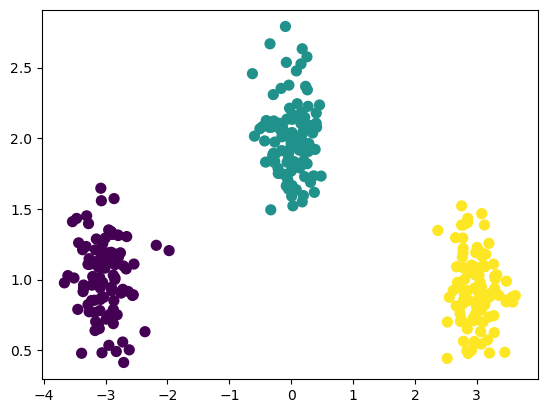

In [2]:
# Create the training data
np.random.seed(2)
X, y = make_blobs(n_samples=300,cluster_std=.25, centers=np.array([(-3,1),(0,2),(3,1)]))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

# One VS All

In [3]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone

class OneVsAllClassifier(BaseEstimator, ClassifierMixin):  
    """
    One-vs-all classifier
    We assume that the classes will be the integers 0,..,(n_classes-1).
    We assume that the estimator provided to the class, after fitting, has a "decision_function" that 
    returns the score for the positive class.
    """
    def __init__(self, estimator, n_classes):      
        """
        Constructed with the number of classes and an estimator (e.g. an
        SVM estimator from sklearn)
        @param estimator : binary base classifier used
        @param n_classes : number of classes
        """
        self.n_classes = n_classes
        self.estimators = [clone(estimator) for _ in range(n_classes)]
        self.fitted = False

    def fit(self, X, y=None):
        """
        This should fit one classifier for each class.
        self.estimators[i] should be fit on class i vs rest
        @param X: array-like, shape = [n_samples,n_features], input data
        @param y: array-like, shape = [n_samples,] class labels
        @return returns self
        """
        #Your code goes here
        for i, estimator in enumerate(self.estimators):
            y_cur = np.zeros(y.shape)
            y_cur[y == i] = 1
            estimator.fit(X, y_cur)
        self.fitted = True
        return self

    def decision_function(self, X):
        """
        Returns the score of each input for each class. Assumes
        that the given estimator also implements the decision_function method (which sklearn SVMs do), 
        and that fit has been called.
        @param X : array-like, shape = [n_samples, n_features] input data
        @return array-like, shape = [n_samples, n_classes]
        """
        if not self.fitted:
            raise RuntimeError("You must train classifer before predicting data.")

        if not hasattr(self.estimators[0], "decision_function"):
            raise AttributeError(
                "Base estimator doesn't have a decision_function attribute.")
        
        #Replace the following return statement with your code
        ret = np.zeros((X.shape[0], self.n_classes))
        for i, estimator in enumerate(self.estimators):
            ret[:, i] = estimator.decision_function(X)
        return ret
    
    def predict(self, X):
        """
        Predict the class with the highest score.
        @param X: array-like, shape = [n_samples,n_features] input data
        @returns array-like, shape = [n_samples,] the predicted classes for each input
        """
        #Replace the following return statement with your code
        ret = np.argmax(self.decision_function(X), axis=1)
        return ret

 

Coeffs 0
[[-1.0585384  -0.90295432]]
Coeffs 1
[[-0.38386961  0.14783551]]
Coeffs 2
[[ 0.89085368 -0.82462135]]


/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/Caskroom/minicond

array([[100,   0,   0],
       [  0, 100,   0],
       [  0,   0, 100]])

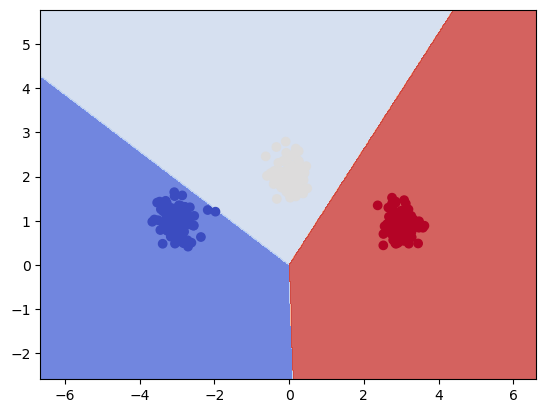

In [6]:
#Here we test the OneVsAllClassifier
from sklearn import svm
svm_estimator = svm.LinearSVC(loss='hinge', fit_intercept=False, C=200)
clf_onevsall = OneVsAllClassifier(svm_estimator, n_classes=3)
clf_onevsall.fit(X,y)

for i in range(3):
    print("Coeffs %d"%i)
    print(clf_onevsall.estimators[i].coef_) #Will fail if you haven't implemented fit yet

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = min(X[:,0])-3,max(X[:,0])+3
y_min, y_max = min(X[:,1])-3,max(X[:,1])+3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_input = np.c_[xx.ravel(), yy.ravel()]

Z = clf_onevsall.predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)


from sklearn import metrics
metrics.confusion_matrix(y, clf_onevsall.predict(X))

## Multiclass SVM

In this question, we will implement stochastic subgradient descent for the linear multiclass SVM, as described in class and in this problem set. We will use the class-sensitive feature mapping approach with the "multivector construction", as described in the multiclass lecture.

15. Complete the function `featureMap` in the skeleton code.

16. Complete the function `sgd`.

17. Complete the methods `subgradient`, `decision_function` and `predict` from the class `MulticlassSVM`.

18. Following the multiclass SVM implementation, we have included another block of test code. Make sure to include the results from these tests in your assignment, along with your code.

In [19]:
def zeroOne(y, a):
    '''
    Computes the zero-one loss.
    @param y: output class
    @param a: predicted class
    @return 1 if different, 0 if same
    '''
    return int(y != a)

def featureMap(X, y, num_classes):
    '''
    Computes the class-sensitive features.
    @param X: array-like, shape = [n_samples,n_inFeatures] or [n_inFeatures,], input features for input data
    @param y: a target class (in range 0,..,num_classes-1)
    @return array-like, shape = [n_samples,n_outFeatures], the class sensitive features for class y
    '''
    #The following line handles X being a 1d-array or a 2d-array
    num_samples, num_inFeatures = (1, X.shape[0]) if len(X.shape) == 1 else (X.shape[0], X.shape[1])
    #your code goes here, and replaces following return

    num_outFeatures = num_classes * num_inFeatures

    if num_samples == 1:
        feature_mapped = np.zeros(num_outFeatures)
        feature_mapped[y * num_inFeatures : (y + 1) * num_inFeatures] = X
        return feature_mapped
    
    feature_mapped = np.zeros((num_samples, num_outFeatures))
    for i, sample in enumerate(X):
        feature_mapped[i, y[i] * num_inFeatures : (y[i] + 1) * num_inFeatures] = sample

    return feature_mapped

def sgd(X, y, num_outFeatures, subgd, eta = 0.1, T = 10000):
    '''
    Runs subgradient descent, and outputs resulting parameter vector.
    @param X: array-like, shape = [n_samples,n_features], input training data 
    @param y: array-like, shape = [n_samples,], class labels
    @param num_outFeatures: number of class-sensitive features
    @param subgd: function taking x,y,w and giving subgradient of objective
    @param eta: learning rate for SGD
    @param T: maximum number of iterations
    @return: vector of weights
    '''
    num_samples = X.shape[0]
    #your code goes here and replaces following return statement
    w = np.zeros(num_outFeatures)
    avg_w = np.zeros(num_outFeatures)
    for t in range(T):
        i = np.random.randint(num_samples)
        x_sample = X[i]
        y_sample = y[i]
        vt = subgd(x_sample, y_sample, w)
        w -= eta * vt
        avg_w += w
    return avg_w / T

class MulticlassSVM(BaseEstimator, ClassifierMixin):
    '''
    Implements a Multiclass SVM estimator.
    '''
    def __init__(self, num_outFeatures, lam=1.0, num_classes=3, Delta=zeroOne, Psi=featureMap):       
        '''
        Creates a MulticlassSVM estimator.
        @param num_outFeatures: number of class-sensitive features produced by Psi
        @param lam: l2 regularization parameter
        @param num_classes: number of classes (assumed numbered 0,..,num_classes-1)
        @param Delta: class-sensitive loss function taking two arguments (i.e., target margin)
        @param Psi: class-sensitive feature map taking two arguments
        '''
        self.num_outFeatures = num_outFeatures
        self.lam = lam
        self.num_classes = num_classes
        self.Delta = Delta
        self.Psi = lambda X,y : Psi(X,y,num_classes)
        self.fitted = False
    
    def subgradient(self,x,y,w):
        '''
        Computes the subgradient at a given data point x,y
        @param x: sample input
        @param y: sample class
        @param w: parameter vector
        @return returns subgradient vector at given x,y,w
        '''
        #Your code goes here and replaces the following return statement
        yi = y
        #here y_prime is equivalent to y in 3.2 in problem set
        hxy = [self.Delta(yi, y_prime) + w.dot(self.Psi(x, y_prime)) - w.dot(self.Psi(x, y))\
               for y_prime in range(self.num_classes)]
        yhat = np.argmax(hxy)
        return 2 * self.lam * w.T + self.Psi(x, yhat) - self.Psi(x, y)
        
    def fit(self,X,y,eta=0.1,T=10000):
        '''
        Fits multiclass SVM
        @param X: array-like, shape = [num_samples,num_inFeatures], input data
        @param y: array-like, shape = [num_samples,], input classes
        @param eta: learning rate for SGD
        @param T: maximum number of iterations
        @return returns self
        '''
        self.coef_ = sgd(X,y,self.num_outFeatures,self.subgradient,eta,T)
        self.fitted = True
        return self
    
    def decision_function(self, X):
        '''
        Returns the score on each input for each class. Assumes
        that fit has been called.
        @param X : array-like, shape = [n_samples, n_inFeatures]
        @return array-like, shape = [n_samples, n_classes] giving scores for each sample,class pairing
        '''
        if not self.fitted:
            raise RuntimeError("You must train classifer before predicting data.")

        #Your code goes here and replaces following return statement
        hxy = np.zeros((len(X),self.num_classes))
        for i,xi in enumerate(X):
            hxy[i,:] = [self.coef_.dot(self.Psi(xi,yi)) for yi in range(self.num_classes)]
        return hxy
            
    def predict(self, X):
        '''
        Predict the class with the highest score.
        @param X: array-like, shape = [n_samples, n_inFeatures], input data to predict
        @return array-like, shape = [n_samples,], class labels predicted for each data point
        '''

        #Your code goes here and replaces following return statement
        return np.argmax(self.decision_function(X), axis=1)

w:
[-0.29893481 -0.05126379  0.0068807   0.11114306  0.29205411 -0.05987927]


array([[100,   0,   0],
       [  0, 100,   0],
       [  0,   0, 100]])

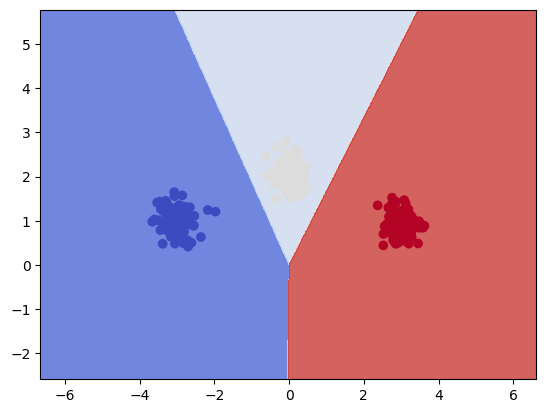

In [20]:
#the following code tests the MulticlassSVM and sgd
#will fail if MulticlassSVM is not implemented yet
est = MulticlassSVM(6,lam=1)
est.fit(X,y)
print("w:")
print(est.coef_)
Z = est.predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)


from sklearn import metrics
metrics.confusion_matrix(y, est.predict(X))